## Import the basic library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from datetime import datetime

## Import the dataset

In [2]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
print(df.shape)
df.head()

(266, 144)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,765,844,851,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,86,86,86,86,88,91,92,96


In [3]:
df1 = df.copy()
df1 = df1.iloc[:,4:]     # because we dont need Province,COuntry etc
print (df1.isnull().sum())    # no missing values
df1.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
6/5/20     0
6/6/20     0
6/7/20     0
6/8/20     0
6/9/20     0
Length: 140, dtype: int64


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,0,0,0,0,0,0,0,0,0,0,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459
1,0,0,0,0,0,0,0,0,0,0,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299
2,0,0,0,0,0,0,0,0,0,0,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382
3,0,0,0,0,0,0,0,0,0,0,...,764,765,844,851,852,852,852,852,852,852
4,0,0,0,0,0,0,0,0,0,0,...,86,86,86,86,86,86,88,91,92,96


### Indexing the date and day wise confirmed cases

In [4]:
daily_cases = df1.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index) # aet the index on the date
daily_cases.head()

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

### Plotting a graph of how graph increase day by day

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


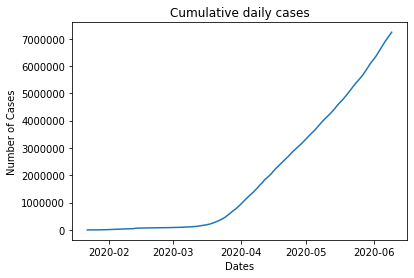

In [5]:
#plt.figure(figsize=(15,8))
plt.plot(daily_cases)
plt.title("Cumulative daily cases")
plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.show()

##### Conclusion:  We can clearly see that the data grows exponentially as the day passing.

## Checking the stationarity of data

### 1) Rolling statistics

In [6]:
# Pandas dataframe.rolling() function provides the feature of rolling window calculations.
# A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.
rolmean = daily_cases.rolling(window=12).mean() # window=365 daily
rolstd = daily_cases.rolling(window=12).std()   # window=12 monthly
print (rolmean)
print ()
print (rolstd)

2020-01-22             NaN
2020-01-23             NaN
2020-01-24             NaN
2020-01-25             NaN
2020-01-26             NaN
                  ...     
2020-06-05    6.108171e+06
2020-06-06    6.224992e+06
2020-06-07    6.343405e+06
2020-06-08    6.462339e+06
2020-06-09    6.581265e+06
Length: 140, dtype: float64

2020-01-22              NaN
2020-01-23              NaN
2020-01-24              NaN
2020-01-25              NaN
2020-01-26              NaN
                  ...      
2020-06-05    417447.074870
2020-06-06    426330.380324
2020-06-07    431123.106434
2020-06-08    431881.961408
2020-06-09    432091.514265
Length: 140, dtype: float64


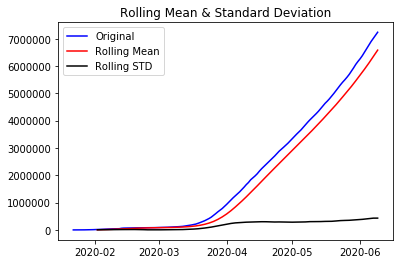

In [7]:
# Plot rolling statistics
original = plt.plot(daily_cases,color = 'blue',label = 'Original')
mean = plt.plot(rolmean,color = 'Red',label = 'Rolling Mean')
std = plt.plot(rolstd,color = 'Black',label = 'Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

##### Conclusion: Mean and Std is not constant, so data is not stationary.

### 2) Dickey-Fuller Test

In [8]:
from statsmodels.tsa.stattools import adfuller

print ('Result from Dickey Fuller Test')
dftest = adfuller(daily_cases[::-1] , autolag='AIC') # Akaike information criterion
# AIC gives you the information about what you wanted in time series, the excat value and the actual value 
# and analyzes the difference between them

dfoutput = pd.Series(dftest[0:4], index=['test Statistics', 'p value', 'Lags Used', 'number of observation Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print (dfoutput)

Result from Dickey Fuller Test
test Statistics                -1.965034
p value                         0.302112
Lags Used                      12.000000
number of observation Used    127.000000
Critical Value (1%)            -3.482920
Critical Value (5%)            -2.884580
Critical Value (10%)           -2.579058
dtype: float64


#### Conclusion: Null Hypothesis says p value should be always less, we have p value : 0.30.   Critical value should alwyas be more than test statistics so here we are fail to reject null hypothesis. So the data is not stationary.

## Estimating trend

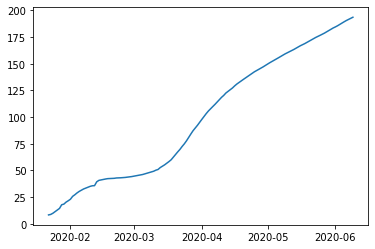

In [9]:
pow = 3
#daily_cases_logScale = np.cbrt(daily_cases)
daily_cases_logScale = np.power(daily_cases,(1./pow))
plt.plot(daily_cases_logScale)

#### Conclusion: As we add the log on the dayaset, the tend of the dataset has changed than original one and value of y axis also changed.

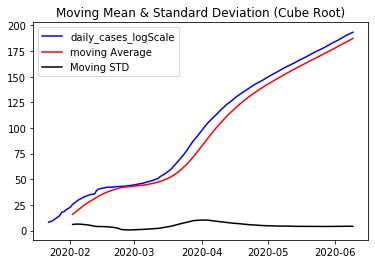

In [10]:
# calculating the moving average on after applying the log on the data
movingAverage = daily_cases_logScale.rolling(window=12).mean() # window=365 daily
movingSTD = daily_cases_logScale.rolling(window=12).std()   # window=12 monthly

plt.plot(daily_cases_logScale,color='blue', label="daily_cases_logScale")
plt.plot(movingAverage,color = 'red', label = 'moving Average')
plt.plot(movingSTD,color = 'black', label = 'Moving STD')
plt.legend(loc='best')
plt.title('Moving Mean & Standard Deviation (Cube Root)')
plt.show()

##### Conclusion: Mean and Std is not constant because it is moving with the time and going to the upward trend so data is not stationary again but it is quite better than the previous one.

### How to make time Series Stationary?

There is no standard way to make time Series Stationary, it depends upon the data. in order to make time series data stationary, you can take log, square, cube root.

## Difference between the moving average and actual number of patient

In [11]:
daily_cases_logscaleMinusMovingAverage = (daily_cases_logScale - movingAverage)/movingSTD
#daily_cases_logscaleMinusMovingAverage = daily_cases_logscaleMinusMovingAverage-daily_cases_logscaleMinusMovingAverage.shift(12)
daily_cases_logscaleMinusMovingAverage.head(13)

2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
2020-01-27         NaN
2020-01-28         NaN
2020-01-29         NaN
2020-01-30         NaN
2020-01-31         NaN
2020-02-01         NaN
2020-02-02    1.633989
2020-02-03    1.550773
dtype: float64

In [12]:
# Removing Nan Values
daily_cases_logscaleMinusMovingAverage.dropna(inplace=True)
daily_cases_logscaleMinusMovingAverage.head(10)

2020-02-02    1.633989
2020-02-03    1.550773
2020-02-04    1.528740
2020-02-05    1.488005
2020-02-06    1.427086
2020-02-07    1.399715
2020-02-08    1.354246
2020-02-09    1.297909
2020-02-10    1.257586
2020-02-11    1.204954
dtype: float64

#### Conclusion: This number is nothing but basically a difference between actaual cases and moving average.

## Define a function for test

In [13]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean() # window=365 daily
    movingSTD = timeseries.rolling(window=12).std()   # window=12 monthly
    
    # plot rolling statistics
    plt.figure(figsize=(12,8))
    plt.plot(timeseries,color='blue', label="daily_cases_logScale")
    plt.plot(movingAverage,color = 'red', label = 'moving Average')
    plt.plot(movingSTD,color = 'black', label = 'Moving STD')
    plt.legend(loc='best')
    plt.title('Moving Mean & Standard Deviation (Cube Root)')
    plt.show()
    
    # perform dickey-fuller test
    print ('Result from Dickey Fuller Test')
    dftest = adfuller(timeseries[::-1] , autolag='AIC') # Akaike information criterion
    # AIC gives you the information about what you wanted in time series, the excat value and the actual value 
    # and analyzes the difference between them
    dfoutput = pd.Series(dftest[0:4], index=['test Statistics', 'p value', 'Lags Used', 'number of observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

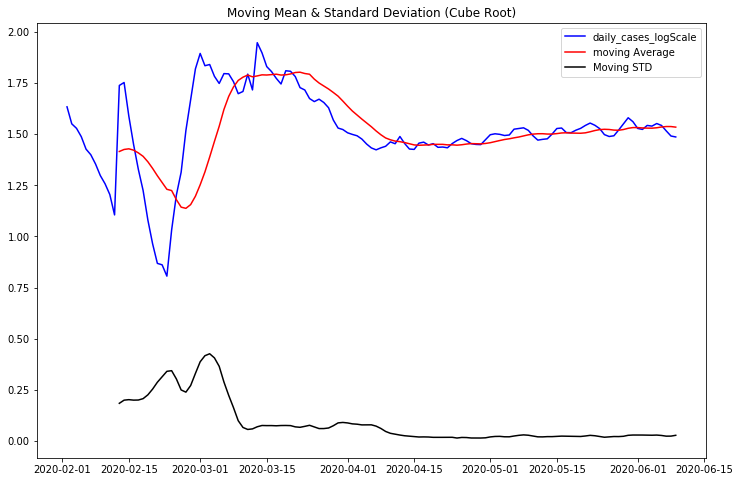

Result from Dickey Fuller Test
test Statistics                -2.941976
p value                         0.040680
Lags Used                       1.000000
number of observation Used    127.000000
Critical Value (1%)            -3.482920
Critical Value (5%)            -2.884580
Critical Value (10%)           -2.579058
dtype: float64


In [14]:
test_stationarity(daily_cases_logscaleMinusMovingAverage)

##### Conclusion: Here p values is much lesser and at 5% and 10% we can reject the null hypothesis. In short we can say that we can see some trend over here. Our data is stationary over here.

### Calculating Weighted Average

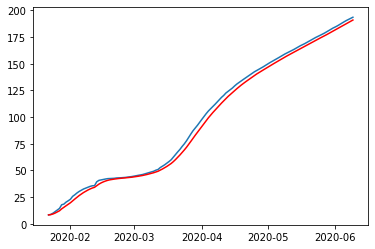

In [15]:
exponentialDecayWeightedAverage = daily_cases_logScale.ewm(halflife=2,min_periods=0,adjust=True).mean()
plt.plot(daily_cases_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

##### Conclusion : Trend is upward and keep increasing in respect with time

### logScale minus WeightedAverage

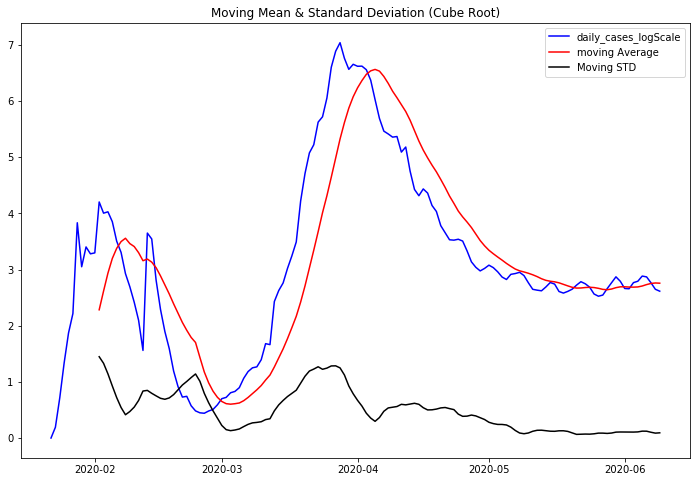

Result from Dickey Fuller Test
test Statistics                -1.644909
p value                         0.459697
Lags Used                       5.000000
number of observation Used    134.000000
Critical Value (1%)            -3.480119
Critical Value (5%)            -2.883362
Critical Value (10%)           -2.578407
dtype: float64


In [16]:
daily_cases_logscaleMinusWeightedAverage = daily_cases_logScale-exponentialDecayWeightedAverage
test_stationarity(daily_cases_logscaleMinusWeightedAverage)

##### Conclusion: Data is not stationary

### Shifting the values of timeSeries using shift() method

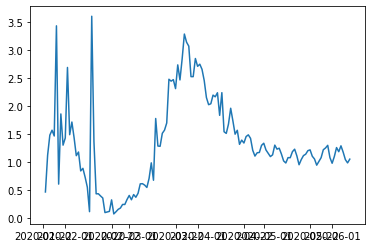

In [17]:
daily_cases_logDiffShifting = daily_cases_logScale - daily_cases_logScale.shift()
plt.plot(daily_cases_logDiffShifting)

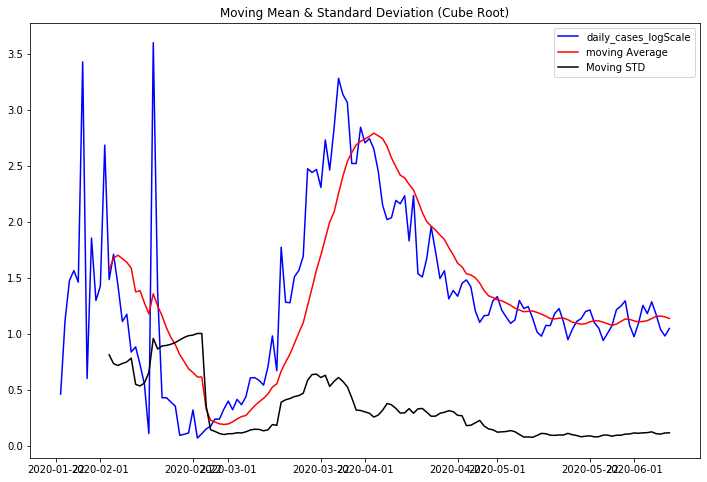

Result from Dickey Fuller Test
test Statistics                -3.068005
p value                         0.029013
Lags Used                      14.000000
number of observation Used    124.000000
Critical Value (1%)            -3.484220
Critical Value (5%)            -2.885145
Critical Value (10%)           -2.579359
dtype: float64


In [18]:
daily_cases_logDiffShifting.dropna(inplace=True)
test_stationarity(daily_cases_logDiffShifting)

##### Conclusion: Null hypothesis rejected and data is stationary now

### Componets of TimeSeries

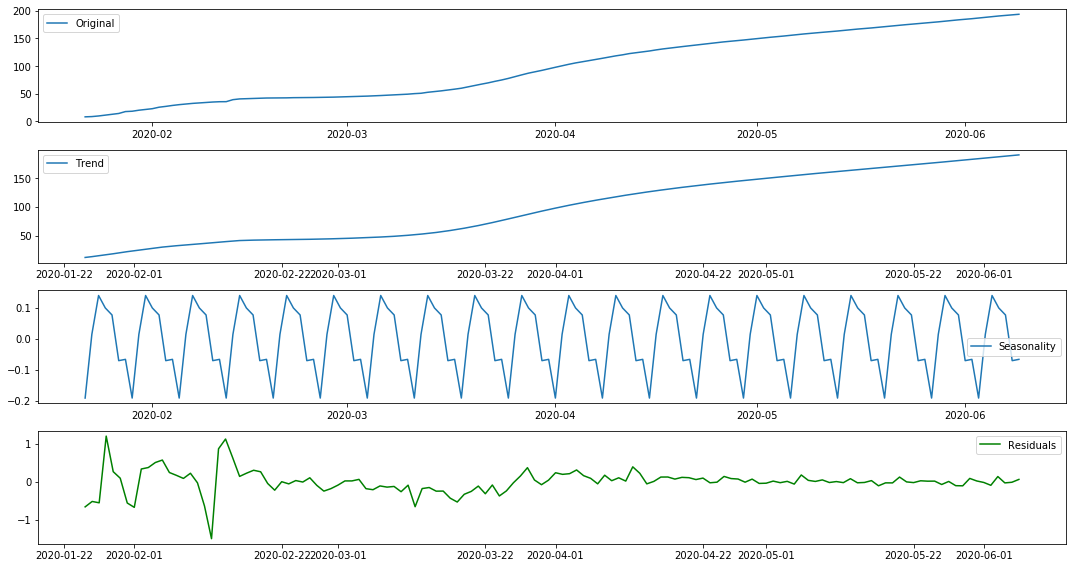

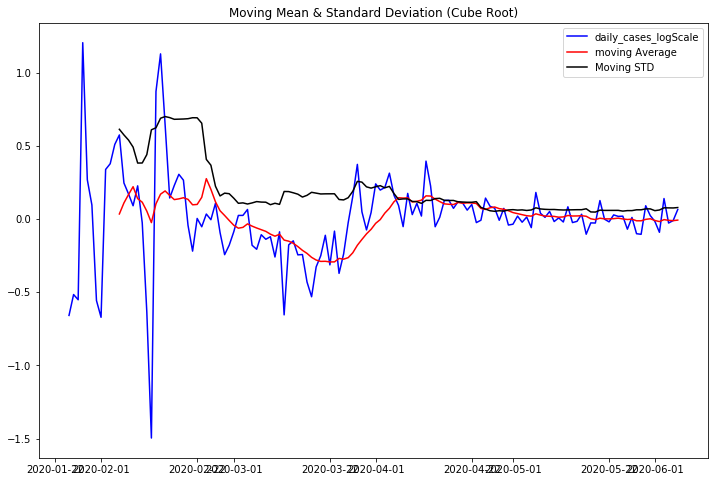

Result from Dickey Fuller Test
test Statistics                -4.892266
p value                         0.000036
Lags Used                       3.000000
number of observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_cases_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(daily_cases_logScale,label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,color = 'green',label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

### Check the noice whether is stationary or not

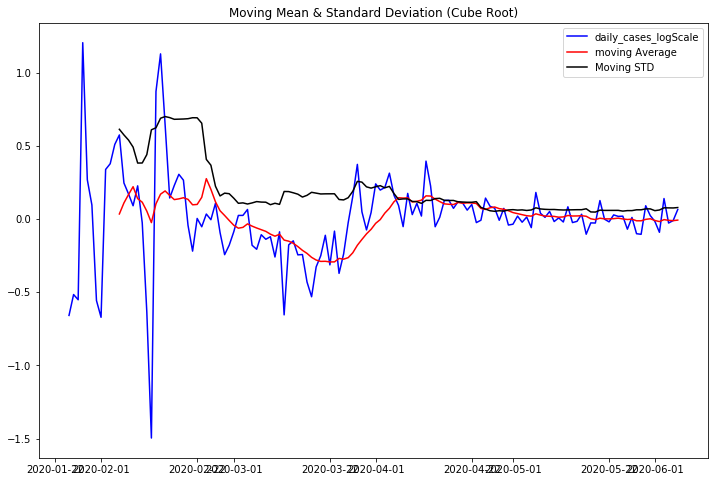

Result from Dickey Fuller Test
test Statistics                -4.892266
p value                         0.000036
Lags Used                       3.000000
number of observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

##### Conclusion: This is not stationary.

### ACF Graph and PACF Graph

C:\Users\parsi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


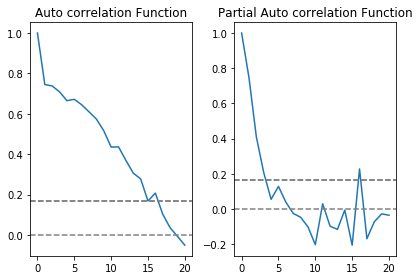

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(daily_cases_logDiffShifting, nlags=20)
lag_pacf = pacf(daily_cases_logDiffShifting, nlags=20, method='ols')

# plot ACF : to calculate the value of Q
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color= 'gray')
plt.axhline(y=1.96/np.sqrt(len(daily_cases_logDiffShifting)), linestyle = '--', color= 'gray')
plt.axhline(y=1.96/np.sqrt(len(daily_cases_logDiffShifting)), linestyle = '--', color= 'gray')
plt.title('Auto correlation Function')

#Plot PACF : to calculate the value of P
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color= 'gray')
plt.axhline(y=1.96/np.sqrt(len(daily_cases_logDiffShifting)), linestyle = '--', color= 'gray')
plt.axhline(y=1.96/np.sqrt(len(daily_cases_logDiffShifting)), linestyle = '--', color= 'gray')
plt.title('Partial Auto correlation Function')
plt.tight_layout()

##### Conclusion: To calculate the value of P and Q, we need to check where the graph hits 0 for the first time

### Fitting the ARIMA model

Plotting AR Model
RSS: 29.3002


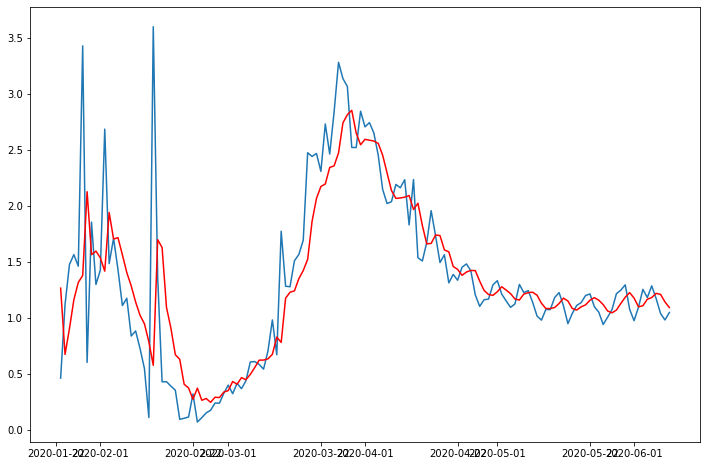

In [22]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# fit model order=(p,d,q)
model = ARIMA(daily_cases_logScale, order=(2,1,2))
resuts_ARIMA = model.fit(disp=-1)

plt.figure(figsize=(12,8))
plt.plot(daily_cases_logDiffShifting)
plt.plot(resuts_ARIMA.fittedvalues, color = 'red')
# plt.title('RSS: %.4f'%sum((resuts_AR.fittedvalues-daily_cases_logDiffShifting)**2))
print ('Plotting AR Model')
print (('RSS: %.4f'%sum((resuts_ARIMA.fittedvalues-daily_cases_logDiffShifting)**2)))

In [23]:
resuts_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  139
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -88.525
Method:                       css-mle   S.D. of innovations              0.455
Date:                Wed, 10 Jun 2020   AIC                            189.049
Time:                        22:31:04   BIC                            206.656
Sample:                    01-23-2020   HQIC                           196.204
                         - 06-09-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2658      0.327      3.876      0.000       0.626       1.906
ar.L1.D.y      0.0043      0.124      0.034      0.973      -0.239       0.248
ar.L2.D.y      0.9096      0.119      7.652      0.000       0.677       1.143
ma.L1.D.y      0.3663      0.141      2.600      0.009       0.090       0.642
ma.L2.D.y     -0.5418      0.100     -5.430      0.000      -0.737      -0.346
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0462           +0.0000j            1.0462            0.0000
AR.2           -1.0509           +0.0000j            1.0509            0.5000
MA.1           -1.0619           +0.0000j            1.0619            0.5000
MA.2            1.7380           +0.0000j            1.7380            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
#! pip install --user pmdarima

##### Conclusion : The greater the RSS, the bad it is.

### Converts the fitted value in Series format

In [25]:
predictions_ARIMA_diff = pd.Series(resuts_ARIMA.fittedvalues, copy =True)
print (predictions_ARIMA_diff.head())

2020-01-23    1.265834
2020-01-24    0.674145
2020-01-25    0.904495
2020-01-26    1.162699
2020-01-27    1.316699
dtype: float64


##### Conxlusion: Here we got the predictions from fitted value

### Calculate the cumulative Sum

In [26]:
predictions_ARIMA_diff_sum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_sum.head())

2020-01-23    1.265834
2020-01-24    1.939979
2020-01-25    2.844474
2020-01-26    4.007173
2020-01-27    5.323873
dtype: float64


### Predictions for fitted Value

In [27]:
predictions_ARIMA_log = pd.Series(daily_cases_logScale.ix[0], index=daily_cases_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_sum,fill_value=0)
predictions_ARIMA_log.head()

2020-01-22     8.217966
2020-01-23     9.483800
2020-01-24    10.157945
2020-01-25    11.062440
2020-01-26    12.225139
dtype: float64

### Original & Predicting Value

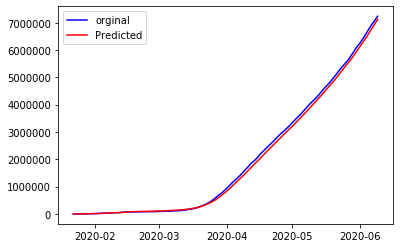

In [28]:
predictions_ARIMA = np.power(predictions_ARIMA_log,pow)
plt.plot(daily_cases,color='blue',label='orginal')
plt.plot(predictions_ARIMA,color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [29]:
daily_cases_logScale

2020-01-22      8.217966
2020-01-23      8.680124
2020-01-24      9.799334
2020-01-25     11.276727
2020-01-26     12.842276
                 ...    
2020-06-05    189.176212
2020-06-06    190.349468
2020-06-07    191.389481
2020-06-08    192.371045
2020-06-09    193.419653
Length: 140, dtype: float64

##### Conclusion: Here we can see the length 140 so we can predict further from that length

### Making a prediction

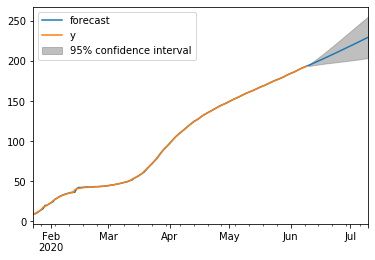

In [30]:
# plot_predict(index,nos of data want from time series)
resuts_ARIMA.plot_predict(1,170)
x = resuts_ARIMA.forecast(steps=30) # steps=no of days for prediction

##### Conclusion: We are predicting for next 30 days and we alraedy have data of 140 days, so we have written 140+30 = 170. You can clearly see in the graph that Grey part is represebtinf the prediction for July. Blue line is forecasted value and grey pary is confidence level, which is 95%. That means thsi value does not exeed the CI.

In [33]:
np.power(x[1],pow)

array([9.44367609e-02, 4.61169918e-01, 1.35531089e+00, 3.08808623e+00,
       6.07943490e+00, 1.07515730e+01, 1.76532090e+01, 2.72732293e+01,
       4.02522755e+01, 5.71056992e+01, 7.85316716e+01, 1.05039179e+02,
       1.37354387e+02, 1.75955087e+02, 2.21571438e+02, 2.74632609e+02,
       3.35854095e+02, 4.05605345e+02, 4.84573315e+02, 5.73061750e+02,
       6.71719272e+02, 7.80781932e+02, 9.00853571e+02, 1.03210353e+03,
       1.17508711e+03, 1.32991006e+03, 1.49707751e+03, 1.67663610e+03,
       1.86904080e+03, 2.07428456e+03])

### Using Auro_Arima

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(daily_cases_logScale, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=185.705, BIC=197.414, Time=0.057 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=229.712, BIC=235.566, Time=0.008 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=195.038, BIC=203.819, Time=0.016 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=184.482, BIC=193.264, Time=0.043 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=227.720, BIC=230.647, Time=0.016 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=185.679, BIC=197.388, Time=0.040 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=184.273, BIC=198.909, Time=0.353 seconds
Fit ARIMA(2,2,2)x(0,0,0,0) [intercept=True]; AIC=189.335, BIC=206.898, Time=0.162 seconds
Fit ARIMA(1,2,3)x(0,0,0,0) [intercept=True]; AIC=189.447, BIC=207.010, Time=0.177 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=187.662, BIC=202.298, Time=0.062 seconds
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=187.684

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(1, 2, 2)   Log Likelihood                 -87.136
Date:                Wed, 10 Jun 2020   AIC                            184.273
Time:                        22:31:07   BIC                            198.909
Sample:                             0   HQIC                           190.221
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.083      0.934      -0.009       0.010
ar.L1          0.8692      0.132      6.578      0.000       0.610       1.128
ma.L1         -1.5849      0.125    -12.713      0.000      -1.829      -1.341
ma.L2          0.6714      0.078      8.609      0.000       0.519       0.824
sigma2         0.2058      0.015     13.570      0.000       0.176       0.236
===================================================================================
Ljung-Box (Q):                       32.54   Jarque-Bera (JB):              2184.15
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""